# ベルヌーイ分布

　ベルヌーイ分布(Bernoulli Distribution)の計算と作図を行います。  
<br>

- 執筆期間：2022/01/11 - 2022/01/11

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-11 17:01


<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import bernoulli, binom, multinomial # ベルヌーイ分布, 二項分布, 多項分布
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。  
<br>

## 定義式の確認

　コインの裏表やくじの当たり外れのように、2値をとる変数の確率分布をベルヌーイ分布と言います。  
　例えば、コインを投げて表なら1、裏なら0である変数を$x$とします。$x$が0か1の値をとることを$x \in \{0,1\}$で表します。ちなみに、コインを1回投げて表が1回出ることを$x = 1$、表が1回も出ない(裏が出る)ことを$x = 0$で表していると理解しておくと、次の二項分布との関係が分かりやすくなります。  
　$x = 1$となる(表が出る)確率を$\phi$を使って表すことにします。$0 \leq \phi \leq 1$であり、$x = 0$となる(裏が出る)確率は$1 - \phi$になります。  

　ベルヌーイ分布は、パラメータ$\phi$を用いて次の式で定義されます。

$$
\mathrm{Bern}(x | \phi)
    = \phi^x (1 - \phi)^{1 - x}
$$

　この式は、コインが表つまり$x = 1$のとき

$$
\begin{aligned}
\mathrm{Bern}(x = 1 | \phi)
   &= \phi^1
      (1 - \phi)^{1-1} \\
   &= \phi * 1 \\
   &= \phi
\end{aligned}
$$

となり、またコインが裏つまり$x = 0$のときは

$$
\begin{aligned}
\mathrm{Bern}(x = 0 | \phi)
   &= \phi^0
      (1 - \phi)^{1-0} \\
   &= 1 * (1 - \phi) \\
   &= 1 - \phi
\end{aligned}
$$

となります。$x^0 = 1$です。  
　このように、$x$の値に対応した確率となるように式が定義されています。  
<br>

　ベルヌーイ分布の対数をとると

$$
\log \mathrm{Bern}(x | \phi)
    = x \log \phi
      + (1 - x) \log (1 - \phi)
$$

となります。対数の性質より$\log x^a = a \log x$です。  

　ベルヌーイ分布の平均と分散は、次の式で計算できます。詳しくは「統計量の導出」を参照してください。

$$
\begin{aligned}
\mathbb{E}[x]
   &= \phi
\\
\mathbb{V}[x]
   &= \phi (1 - \phi)
\end{aligned}
$$

<br>

　これらの計算を行いグラフを作成します。  
<br>

## 確率の計算

　ベルヌーイ分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
phi = 0.3

# 確率変数の値を指定
x = 1.0

　ベルヌーイ分布のパラメータ$0 \leq \phi \leq 1$と確率変数がとり得る値$x \in \{0, 1\}$を指定します。設定した値に従う確率を計算します。  

　まずは、定義式から確率を計算します。

In [4]:
# 定義式により確率を計算
prob = phi**x * (1.0 - phi)**(1.0 - x)
print(prob)

0.3


　ベルヌーイ分布の定義式

$$
p(x | \phi)
    = \phi^x (1 - \phi)^{1 - x}
$$

で計算します。  
　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率を計算
log_prob = x * np.log(phi) + (1.0 - x) * np.log(1.0 - phi)
prob = np.exp(log_prob)
print(prob, log_prob)

0.3 -1.2039728043259361


　対数をとった定義式

$$
\log p(x | \phi)
    = x \log \phi
      + (1 - x) \log (1 - \phi)
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
p(x | \phi)
    = \exp \Bigr(
          \log p(x | \phi)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　ベルヌーイ分布のモジュール`bernoulli`の確率計算メソッド`pmf()`を使って計算します。

In [6]:
# ベルヌーイ分布の関数により確率を計算
prob = bernoulli.pmf(k=x, p=phi)
print(prob)

0.3


　引数`k`に`x`、成功確率の引数`p`に`phi`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [7]:
# ベルヌーイ分布の対数をとった関数により確率を計算
log_prob = bernoulli.logpmf(k=x, p=phi)
prob = np.exp(log_prob)
print(prob, log_prob)

0.3 -1.2039728043259361


　計算結果の指数をとると確率が得られます。  

　二項分布のモジュール`binom`の確率計算メソッド`pmf()`を使って計算します。

In [8]:
# 二項分布の関数により確率を計算
prob = binom.pmf(k=x, n=1, p=phi)
print(prob)

0.3


　試行回数の引数`n`に`1`を指定することで、ベルヌーイ分布の確率を計算できます。  
　成功回数の引数`k`に`x`、成功確率の引数`p`に`phi`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [9]:
# 二項分布の対数をとった関数により確率を計算
log_prob = binom.logpmf(k=x, n=1, p=phi)
prob = np.exp(log_prob)
print(prob, log_prob)

0.3 -1.2039728043259361


　計算結果の指数をとると確率が得られます。  

　以降の計算は、変数とパラメータをベクトルに変換しておく必要があります。

In [10]:
# ベクトルに変換
x_v = np.array([1 - x, x])
phi_v = np.array([1.0 - phi, phi])

　$x = 0$となる確率$1 - \phi$と、$x = 1$となる確率$\phi$を持つ配列を作成して`phi_v`とします。  
　$x = 0$のとき$1 - x = 1$、$x = 1$のとき$1 - x = 0$となるのを利用して、one-hotベクトル(1-of-K符号化法)の$x$を作成して`x_v`とします。  

　多項分布のモジュール`multinomial`の確率計算メソッド`pmf()`を使って計算します。

In [11]:
# 多項分布の関数により確率を計算
prob = multinomial.pmf(x=x_v, n=1, p=phi_v)
print(prob)

0.30000000000000004


　二項分布と同様に試行回数の引数を`n=1`として、出現頻度の引数`x`に`x`、出現確率の引数`p`に`phi_v`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [12]:
# 多項分布の対数をとった関数により確率を計算
log_prob = multinomial.logpmf(x=x_v, n=1, p=phi_v)
prob = np.exp(log_prob)
print(prob, log_prob)

0.30000000000000004 -1.203972804325936


　計算結果の指数をとると確率が得られます。  

　最後に、スライス機能を使って確率を取り出します。

In [13]:
# インデックスにより確率を抽出
prob = phi_v[np.int(x)]
print(prob)

0.3


　`x`が`0`となる確率は`phi_v`の0番目の要素で、`1`となる確率は`phi_v`の1番目の要素なので、`x`の値に対応するパラメータのインデックスは`x`になります。  
<br>

## 統計量の計算

　ベルヌーイ分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [14]:
# 定義式により平均を計算
E_x = phi
print(E_x)

0.3


　ベルヌーイ分布の平均は、次の式で計算できます。

$$
\mathbb{E}[x]
    = \phi
$$

　各分布のモジュールの平均メソッド`mean()`でも計算できます。

In [15]:
# ベルヌーイ分布の関数により平均を計算
print(bernoulli.mean(p=phi))

# 二項分布の関数により平均を計算
print(binom.mean(n=1, p=phi))

0.3
0.3


　確率計算と同様に引数を指定します。  

　分散を計算します。

In [16]:
# 分散を計算
V_x = phi * (1.0 - phi)
print(V_x)

0.21


　ベルヌーイ分布の分散は、次の式で計算できます。

$$
\mathbb{V}[x]
    = \phi (1 - \phi)
$$

　`var()`メソッドで分散を計算できます。

In [17]:
# ベルヌーイ分布の関数により分散を計算
print(bernoulli.var(p=phi))

# 二項分布の関数により分散を計算
print(binom.var(n=1, p=phi))

0.21
0.21


　こちらも同様に引数を指定します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してベルヌーイ分布のグラフを作成します。  
<br>

　作図用の配列を作成します。

In [18]:
# パラメータを指定
phi = 0.3

# 作図用の値を作成
x_vals = np.array([0.0, 1.0])
probability = np.array([1.0 - phi, phi])
print(x_vals)
print(probability)

[0. 1.]
[0.7 0.3]


　$x$がとり得る値`0, 1`と、それに対応する確率`1 - phi, phi`を配列に格納します。  

　ベルヌーイ分布のグラフを作成します。

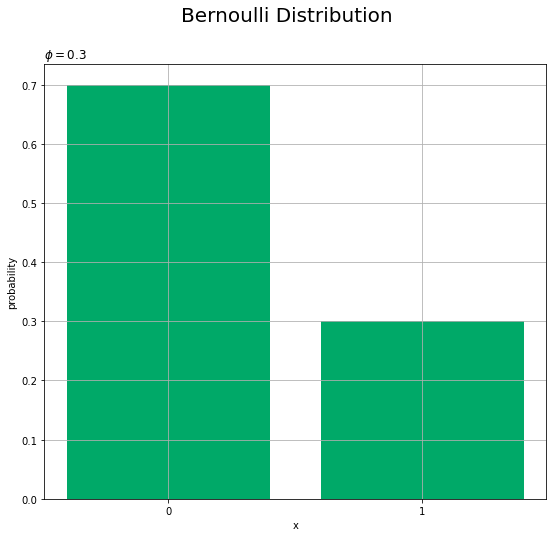

In [19]:
# ベルヌーイ分布を作図
plt.figure(figsize=(9, 8)) # 図の設定
plt.bar(x_vals, probability, color='#00A968') # 棒グラフ
#plt.vlines(x=E_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle='--', label='$E[x]$') # 平均
#plt.vlines(x=E_x - V_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle=':', label='$E[x] - \sqrt{V[x]}$') # 平均 - 標準偏差
#plt.vlines(x=E_x + V_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle=':', label='$E[x] + \sqrt{V[x]}$') # 平均 + 標準偏差
plt.xlabel('x') # x軸ラベル
plt.ylabel('probability') # y軸ラベル
plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + '$', loc='left') # タイトル
plt.xticks(ticks=[0, 1]) # x軸目盛
#plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　パラメータの値そのままですが、これがベルヌーイ分布のグラフです。  
<br>

## パラメータとグラフの形状の関係

　続いて、パラメータ$\phi$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


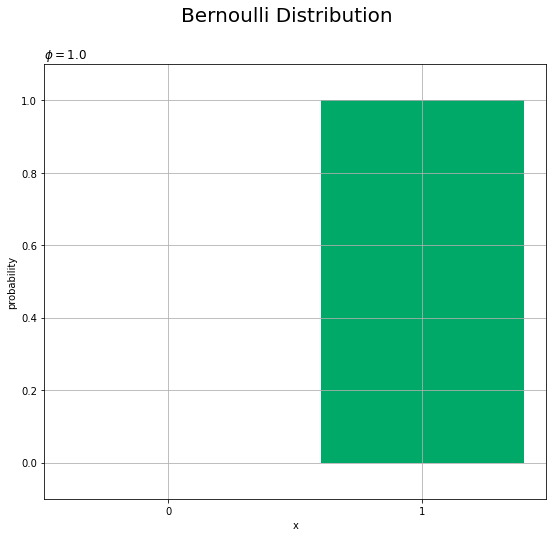

In [20]:
# 作図用のphiの値を作成
phi_vals = np.arange(start=0.0, stop=1.01, step=0.01)

# 図を初期化
fig = plt.figure(figsize=(9, 8))

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i回目の値を取得
    phi = phi_vals[i]
    
    # ベルヌーイ分布を作図
    plt.bar([0.0, 1.0], [1.0 - phi, phi], color='#00A968') # 棒グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('probability') # y軸ラベル
    plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(np.round(phi, 2)) + '$', loc='left') # タイトル
    plt.xticks(ticks=[0, 1]) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(phi_vals), interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Bernoulli_prob.gif')

　$\phi$がとり得る値を作成して`phi_vals`とします。  
　`phi_vals`の値ごとに作図します。

　(定義のままですが、)パラメータ$\phi$の値が大きくなるほど、$x = 0$となる確率が下がり、$x = 1$となる確率が上がるのを確認できます。  
<br>

## 乱数の生成

　ベルヌーイ分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、ベルヌーイ分布に従う乱数を生成します。

In [21]:
# パラメータを指定
phi = 0.3

# データ数を指定
N = 1000

# ベルヌーイ分布に従う乱数を生成
x_n = np.random.binomial(n=1, p=phi, size=N)
print(x_n[:5])

[0 0 0 0 0]


　二項分布の乱数生成関数`np.random.binomial()`の試行回数の引数`n `に`1`を指定することで、ベルヌーイ分布に従う乱数を生成できます。  
　データ数(サンプルサイズ)の引数`size`に`N`、成功確率の引数`p`に`phi`を指定します。  

　サンプルの値を集計します。

In [22]:
# 乱数を集計
frequency = np.array([np.sum(x_n == 0), np.sum(x_n == 1)])
print(frequency)

[685 315]


　`x_n`に含まれる`0`の要素数は、`np.sum(x_n == 0)`で得られます。値が`1`の要素数も同様に求めて、配列に格納します。  
　また、得られた頻度`frequency`をデータ数`N`で割り、`0`と`1`の構成比を計算します。  

　ヒストグラムを作成します。

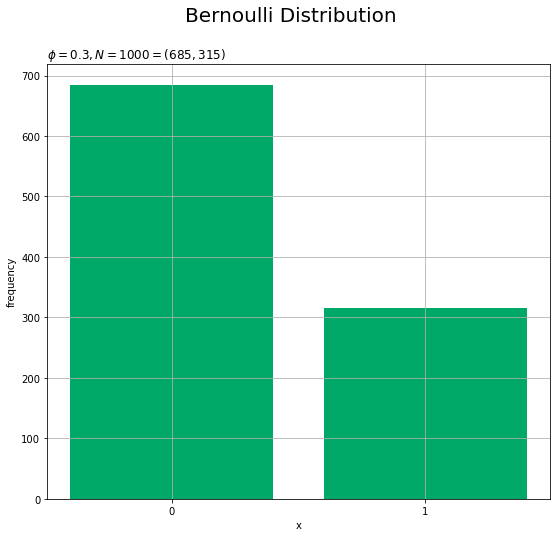

In [23]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(9, 8)) # 図の設定
plt.bar(x_vals, frequency, color='#00A968') # ヒストグラム
plt.xlabel('x') # x軸ラベル
plt.ylabel('frequency') # y軸ラベル
plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + ', N=' + str(N) + 
          '=(' + str(np.sum(x_n == 0)) + ', ' + str(np.sum(x_n == 1)) + ')$', loc='left') # タイトル
plt.xticks(ticks=[0, 1]) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画


　構成比を分布と重ねて描画します。

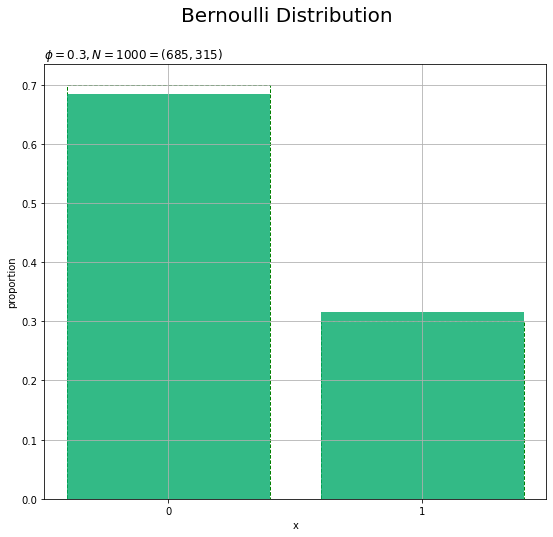

In [24]:
# サンプルの構成比を作図
plt.figure(figsize=(9, 8)) # 図の設定
plt.bar(x_vals, probability, color='white', edgecolor='green', linestyle='--') # 分布
plt.bar(x_vals, frequency / N, color='#00A968', alpha=0.8) # 構成比
plt.xlabel('x') # x軸ラベル
plt.ylabel('proportion') # y軸ラベル
plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + ', N=' + str(N) + 
          '=(' + str(np.sum(x_n == 0)) + ', ' + str(np.sum(x_n == 1)) + ')$', loc='left') # タイトル
plt.xticks(ticks=[0, 1]) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

　データ数が十分に増えると分布に形が近づきます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。  

MovieWriter ffmpeg unavailable; using Pillow instead.


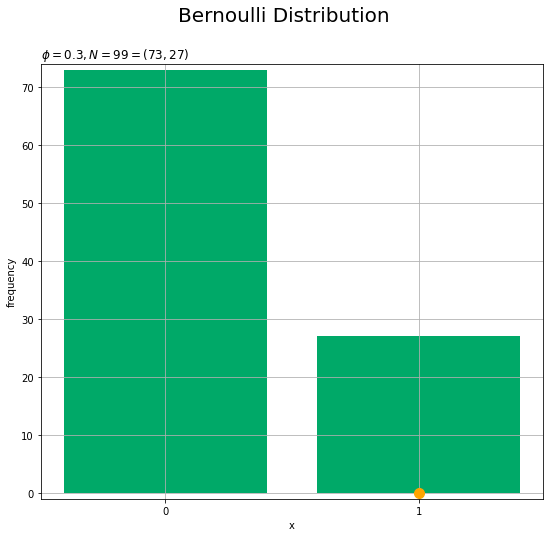

In [25]:
# フレーム数を指定
N = 100

# 図を初期化
fig = plt.figure(figsize=(9, 8))

# 頻度の最大値を取得
y_max = np.max([np.sum(x_n[:N] == 0), np.sum(x_n[:N] == 1)])

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == 0), np.sum(x_n[:(n+1)] == 1)])
    
    # サンプルのヒストグラムを作成
    plt.bar(x_vals, frequency, color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x_n[n], 0.0, color='orange', s=100, zorder=2) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('frequency') # y軸ラベル
    plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(phi) + ', N=' + str(n) + 
              '=(' + str(frequency[0]) + ', ' + str(frequency[1]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=[0, 1]) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-1.0, y_max + 1.0) # y軸の表示範囲

# gif画像を作成
anime_hist = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_hist.save('../figure/Python/Bernoulli_hist.gif')

<br>

　構成比のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


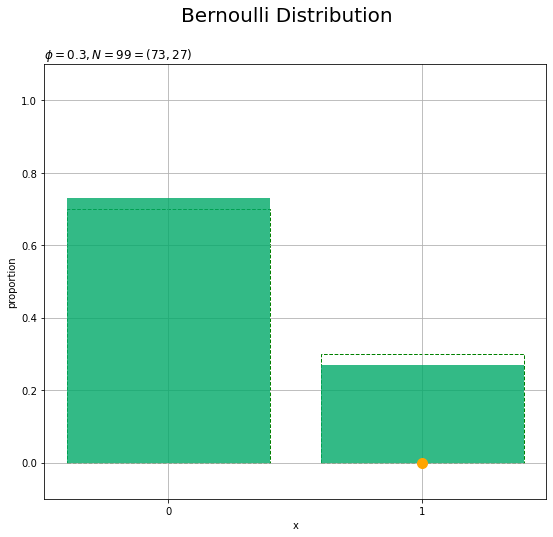

In [26]:
# 図を初期化
fig = plt.figure(figsize=(9, 8))

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == 0), np.sum(x_n[:(n+1)] == 1)])
    
    # サンプルの構成比を作成
    plt.bar(x_vals, probability, color='white', edgecolor='green', linestyle='--', zorder=1) # 分布
    plt.bar(x_vals, frequency / (n + 1), color='#00A968', alpha=0.8, zorder=2) # 構成比
    plt.scatter(x_n[n], 0.0, color='orange', s=100, zorder=3) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('proportion') # y軸ラベル
    plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(phi) + ', N=' + str(n) + 
              '=(' + str(frequency[0]) + ', ' + str(frequency[1]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=[0, 1]) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Bernoulli_prop.gif')

　サンプルが増えるに従って、真の分布に近付いていくのを確認できます。  

　以上で、ベルヌーイ分布を確認できました。  
<br>